# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
corona_data = pd.read_csv('Datasets/covid19_Confirmed_dataset.csv')
corona_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [7]:
corona_data.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [3]:
corona_data.drop(['Lat','Long'], axis = 1, inplace = True )

In [4]:
corona_data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by the country

In [5]:
corona_by_country_region = corona_data.groupby('Country/Region').sum()

In [6]:
corona_by_country_region.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
corona_by_country_region.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

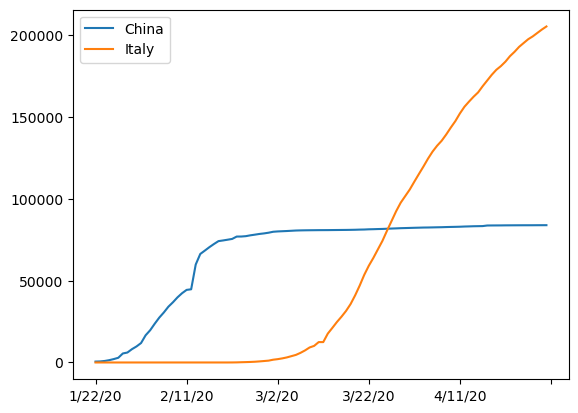

In [16]:
corona_by_country_region.loc['China'].plot()
corona_by_country_region.loc['Italy'].plot()

plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

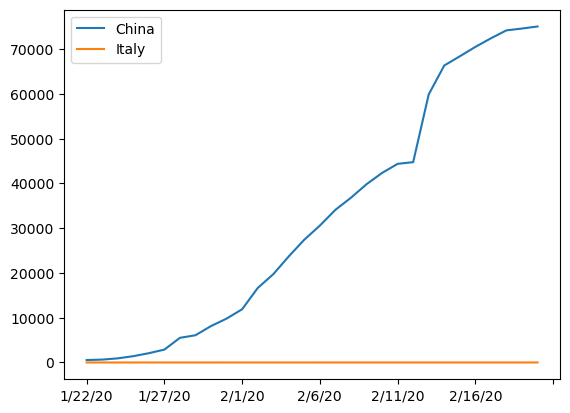

In [17]:
corona_by_country_region.loc['China'][:30].plot()
corona_by_country_region.loc['Italy'][:30].plot()

plt.legend()

### task 3.1: caculating the first derivative of the curve

<AxesSubplot: >

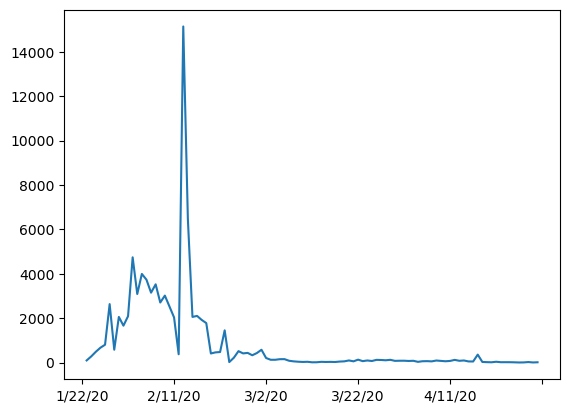

In [18]:
corona_by_country_region.loc['China'].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [19]:
corona_by_country_region.loc['China'].diff().max()

15136.0

In [20]:
corona_by_country_region.loc['Italy'].diff().max()

6557.0

In [21]:
corona_by_country_region.loc['Japan'].diff().max()

1161.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [25]:
countries = list(corona_by_country_region.index)
max_infection_rate = []
for c in countries :
    max_infection_rate.append(corona_by_country_region.loc[c].diff().max())
corona_by_country_region['max_infection_rate'] = max_infection_rate

In [26]:
corona_by_country_region.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed column 

In [29]:
corona_data = pd.DataFrame(corona_by_country_region['max_infection_rate']) 

In [30]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [43]:
happiness_report = pd.read_csv('Datasets/worldwide_happiness_report.csv')

In [44]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [45]:
happiness_report.drop(['Overall rank', 'Generosity'], axis= 1, inplace = True)

In [46]:
happiness_report.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298


### Task 4.3: changing the indices of the dataframe

In [47]:
happiness_report.set_index("Country or region", inplace= True)
happiness_report.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,,
Finland,7.769,1.340,1.587,0.986,0.596,0.393
Denmark,7.600,1.383,1.573,0.996,0.592,0.410
Norway,7.554,1.488,1.582,1.028,0.603,0.341
Iceland,7.494,1.380,1.624,1.026,0.591,0.118
Netherlands,7.488,1.396,1.522,0.999,0.557,0.298


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [49]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


#### wolrd happiness report Dataset :

In [50]:
happiness_report.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,,
Finland,7.769,1.340,1.587,0.986,0.596,0.393
Denmark,7.600,1.383,1.573,0.996,0.592,0.410
Norway,7.554,1.488,1.582,1.028,0.603,0.341
Iceland,7.494,1.380,1.624,1.026,0.591,0.118
Netherlands,7.488,1.396,1.522,0.999,0.557,0.298


In [53]:
data = corona_data.join(happiness_report, how= "inner")
data.head()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000,0.025
Albania,34.0,4.719,0.947,0.848,0.874,0.383,0.027
Algeria,199.0,5.211,1.002,1.160,0.785,0.086,0.114
Argentina,291.0,6.086,1.092,1.432,0.881,0.471,0.050
Armenia,134.0,4.559,0.850,1.055,0.815,0.283,0.064


### Task 4.5: correlation matrix 

In [54]:
data.corr()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
max_infection_rate,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196,0.097703
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007,0.420437
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603,0.311577
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246,0.203225
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892,0.314811
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000,0.446677
Perceptions of corruption,0.097703,0.420437,0.311577,0.203225,0.314811,0.446677,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [55]:
data.head()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000,0.025
Albania,34.0,4.719,0.947,0.848,0.874,0.383,0.027
Algeria,199.0,5.211,1.002,1.160,0.785,0.086,0.114
Argentina,291.0,6.086,1.092,1.432,0.881,0.471,0.050
Armenia,134.0,4.559,0.850,1.055,0.815,0.283,0.064


### Task 5.1: Plotting GDP vs maximum Infection rate

<AxesSubplot: xlabel='GDP per capita', ylabel='max_infection_rate'>

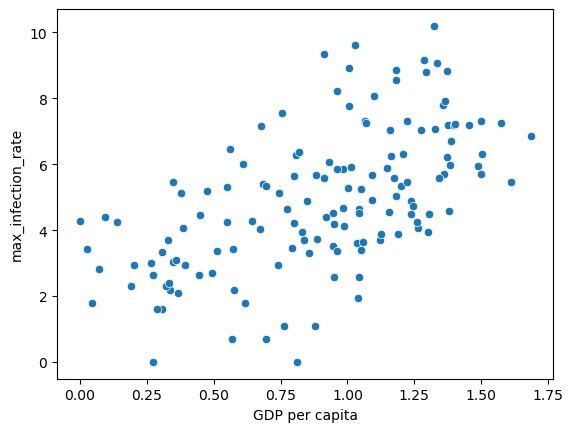

In [61]:
x = data['GDP per capita']
y = data['max_infection_rate']
sns.scatterplot(x = x,y = np.log(y))

<AxesSubplot: xlabel='GDP per capita', ylabel='max_infection_rate'>

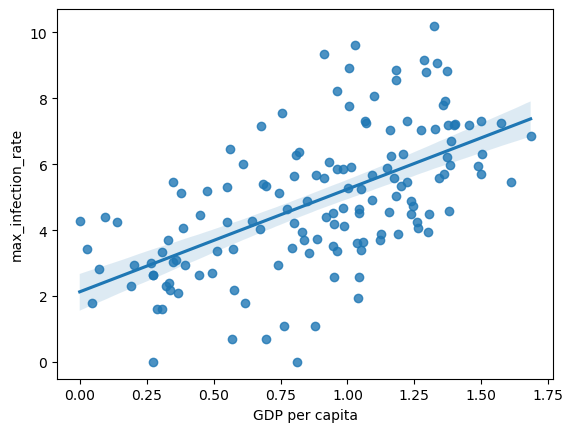

In [62]:
sns.regplot(x = x,y = np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rate'>

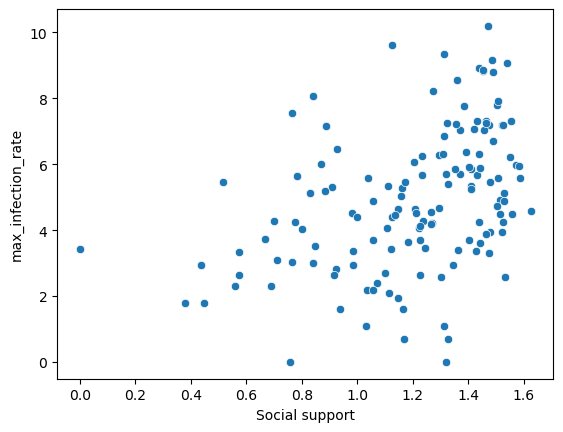

In [63]:
x = data['Social support']
y = data['max_infection_rate']
sns.scatterplot(x = x,y = np.log(y))

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rate'>

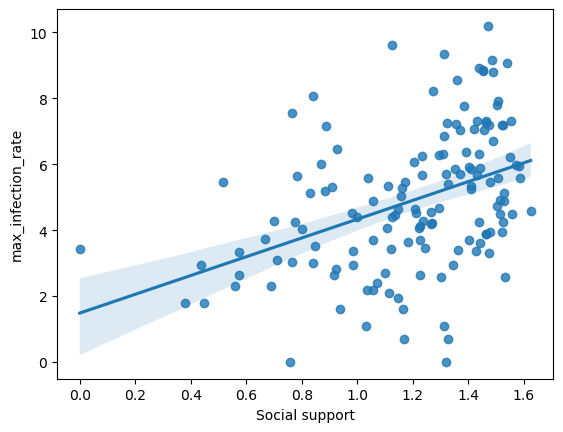

In [64]:
sns.regplot(x = x,y = np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rate'>

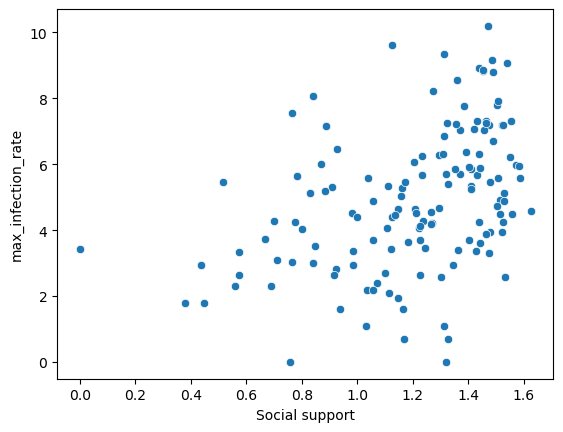

In [65]:
x = data['Social support']
y = data['max_infection_rate']
sns.scatterplot(x = x,y = np.log(y))

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rate'>

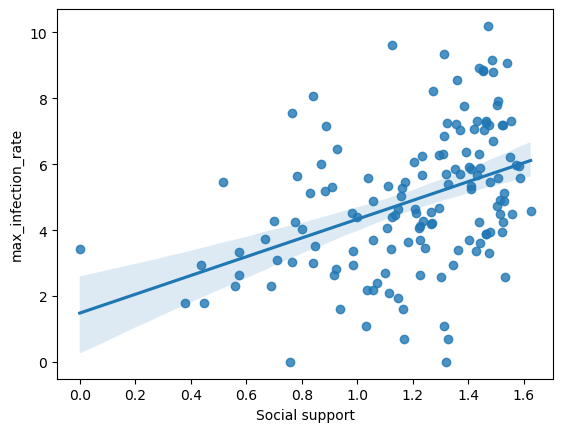

In [66]:
sns.regplot(x = x,y = np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

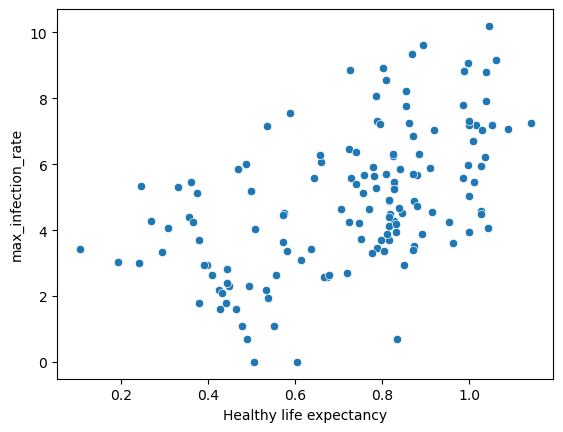

In [67]:
x = data['Healthy life expectancy']
y = data['max_infection_rate']
sns.scatterplot(x = x,y = np.log(y))

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

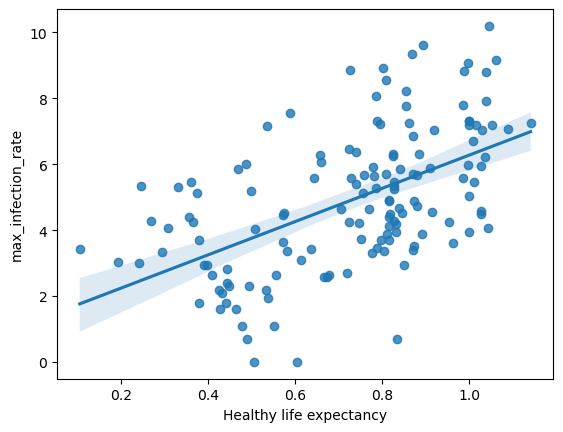

In [68]:
sns.regplot(x = x,y = np.log(y))